<a href="https://colab.research.google.com/github/CristianRiascos/Alura-DS-Python-Challenge/blob/master/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe

Este informe tiene cómo ojetivo  ayudar al señor Juan a determinar de forma objetiva qué tienda debe vender para poder invertir en un nuevo negocio.

Juan cuenta con 4 tiendas donde 1 de ellas debe de ser vendida, se elegirá tomando en consideración la que menor desempeño tenga en varias categorías que serán analizadas a continuación.

# Importación de datos

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Análisis de Datos

##1. Análisis de facturación



Primero, se obtendrán los ingresos totales de cada tienda

In [2]:
ingreso_total_tienda1 = sum(tienda['Precio'])
ingreso_total_tienda2 = sum(tienda2['Precio'])
ingreso_total_tienda3 = sum(tienda3['Precio'])
ingreso_total_tienda4 = sum(tienda4['Precio'])

Ahora se agrupan en un DataFrame para poder ser graficados con más facilidad en la siguiente sección

In [3]:
ingresos_totales = pd.DataFrame( {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4 ],
}).set_index('Tienda')
ingresos_totales

,Ingreso Total
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


## 2. Ventas por categoría

Ahora, se recolectarán qué el número de ventas por cada categoría de productos en cada tienda

In [4]:
ventas_por_categoria_tienda1 = tienda['Categoría del Producto'].value_counts().to_frame(name='Cantidad de Ventas Tienda 1')
ventas_por_categoria_tienda2 = tienda2['Categoría del Producto'].value_counts().to_frame(name='Cantidad de Ventas Tienda 2')
ventas_por_categoria_tienda3 = tienda3['Categoría del Producto'].value_counts().to_frame(name='Cantidad de Ventas Tienda 3')
ventas_por_categoria_tienda4 = tienda4['Categoría del Producto'].value_counts().to_frame(name='Cantidad de Ventas Tienda 4')

## 3. Calificación promedio de la tienda


Se toman las calificaciones obtenidas por los clientes en promedio por cada tienda

In [5]:
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

Considere que las calificaciones van de 1.0 a 5.0. Siendo 1.0 la más baja y 5.0 la más alta

In [6]:
tienda['Calificación'].describe()

,Calificación
count,2359.000000
mean,3.976685
std,1.415370
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


Como en el primer análisis, se agrupan los datos en un DataFrame


In [7]:
calificacion_promedio_tiendas = pd.DataFrame({
    'Tienda' : [ 'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4' ],
    'Calificación': [ calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]
}).set_index('Tienda')
calificacion_promedio_tiendas

,Calificación
Tienda,
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


## 4. Productos más y menos vendidos

Después, se extraen la cantidad de productos vendidos. Con esta información se puede determinar cuáles son los más y menos vendidos por cada tienda.

In [8]:
productos_mas_vendidos_tienda1 = tienda['Producto'].value_counts()
productos_mas_vendidos_tienda2 = tienda2['Producto'].value_counts()
productos_mas_vendidos_tienda3 = tienda3['Producto'].value_counts()
productos_mas_vendidos_tienda4 = tienda4['Producto'].value_counts()

Resultado preliminar para la Tienda 1

In [9]:
productos_mas_vendidos_tienda1

,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56
Bloques de construcción,56
Balón de baloncesto,55
Bicicleta,54
Vaso térmico,54


## 5. Envío promedio por tienda

Finalizando el análisis de datos, se recopilan los costos de envío promedio por cada tienda.

In [10]:
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

Luego se agrupan estos datos en un DataFrame

In [11]:
costo_envio_promedio_tiendas = pd.DataFrame({
    'Tienda' : ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo Promedio Envío' : [ costo_envio_promedio_tienda1, costo_envio_promedio_tienda2, costo_envio_promedio_tienda3, costo_envio_promedio_tienda4 ]
}).set_index('Tienda')
costo_envio_promedio_tiendas

,Costo Promedio Envío
Tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


# Gráficos

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Ingresos Totales por Tienda

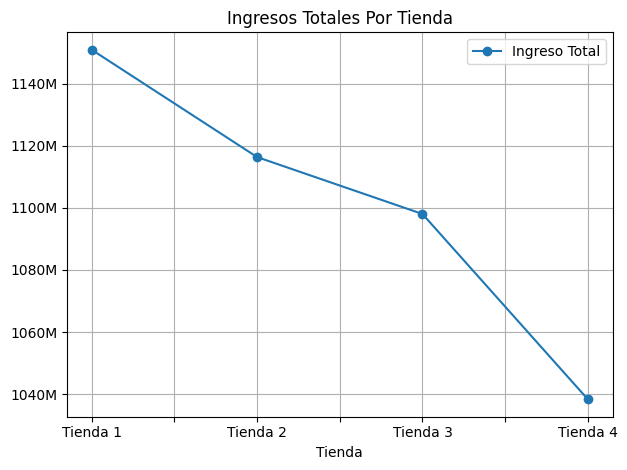

In [13]:
ax = ingresos_totales.plot(
    title='Ingresos Totales Por Tienda',
    grid=True,
    marker='o'
)

# Format y-axis to show normal numbers with commas
ax.yaxis.set_major_formatter( FuncFormatter(lambda x, p: f'{x/1e6:.0f}M') )

plt.tight_layout()
plt.show()

## Ventas de Cada Categoría por Tiendas

In [14]:
def graficar_categorías( ventas_por_categoria_tienda, titulo ):
  ventas_por_categoria_tienda.plot(
      kind='barh',
      legend=False,
      title=titulo,
      xlabel='Cantidad de Ventas',
      ylabel='Tipo de Producto'
  )

  plt.tight_layout()
  plt.show()

### Tienda 1

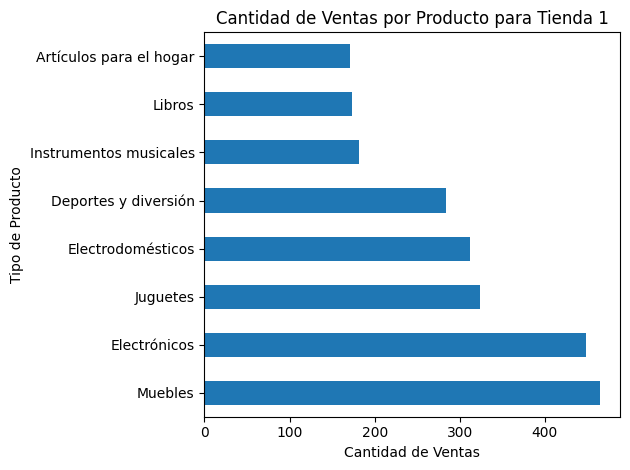

In [15]:
graficar_categorías( ventas_por_categoria_tienda1, 'Cantidad de Ventas por Producto para Tienda 1')

### Tienda 2

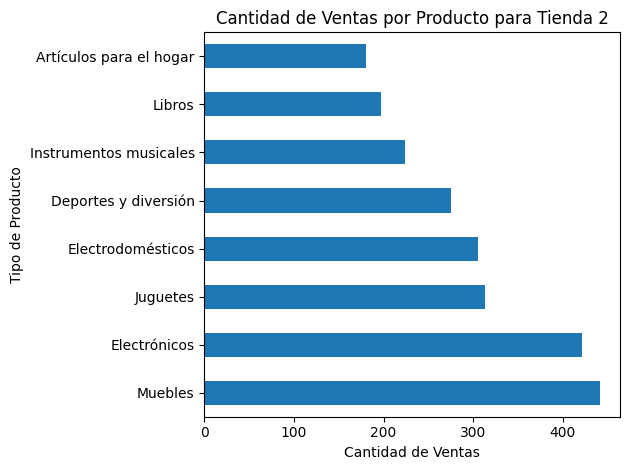

In [16]:
graficar_categorías( ventas_por_categoria_tienda2, 'Cantidad de Ventas por Producto para Tienda 2')

### Tienda 3

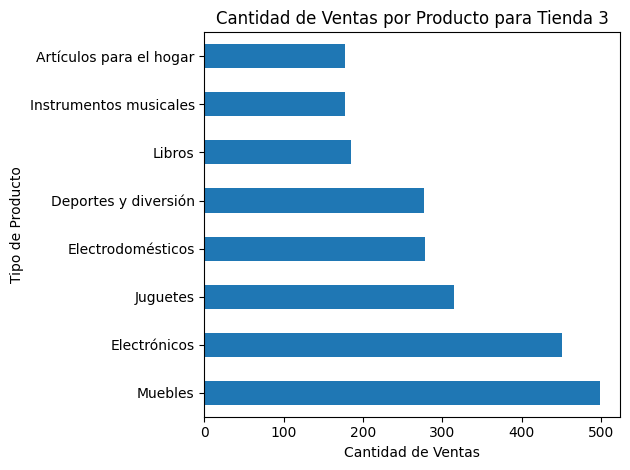

In [17]:
graficar_categorías( ventas_por_categoria_tienda3, 'Cantidad de Ventas por Producto para Tienda 3')

### Tienda 4

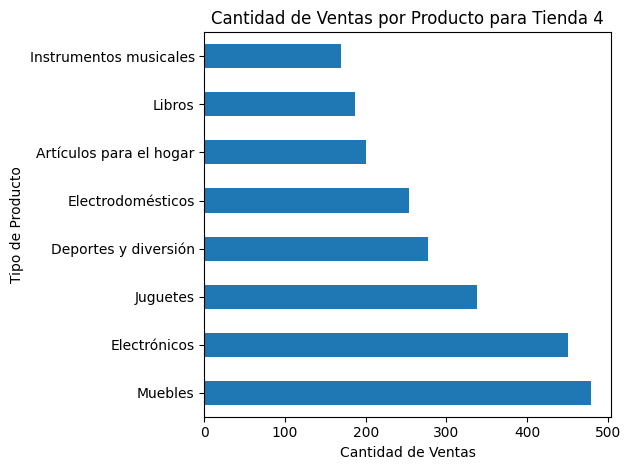

In [18]:
graficar_categorías( ventas_por_categoria_tienda4, 'Cantidad de Ventas por Producto para Tienda 4')

## Calificación Promedio por Cada Tienda

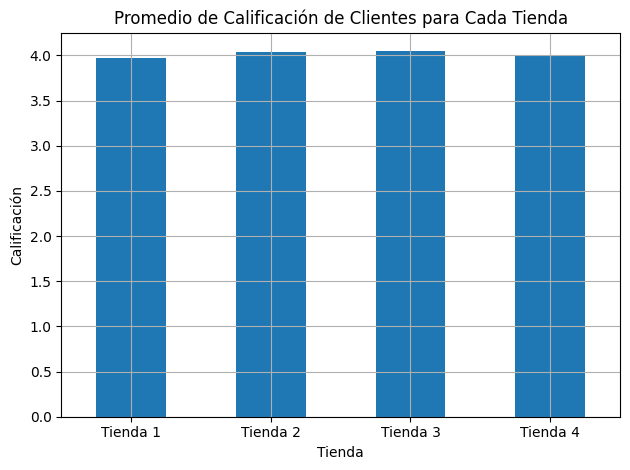

In [19]:
calificacion_promedio_tiendas.plot(
    kind='bar',
    title='Promedio de Calificación de Clientes para Cada Tienda',
    legend=False,
    ylabel='Calificación',
    rot=360,
    grid=True
)

plt.tight_layout()
plt.show()

## Costo Promedio de Envio por Tienda

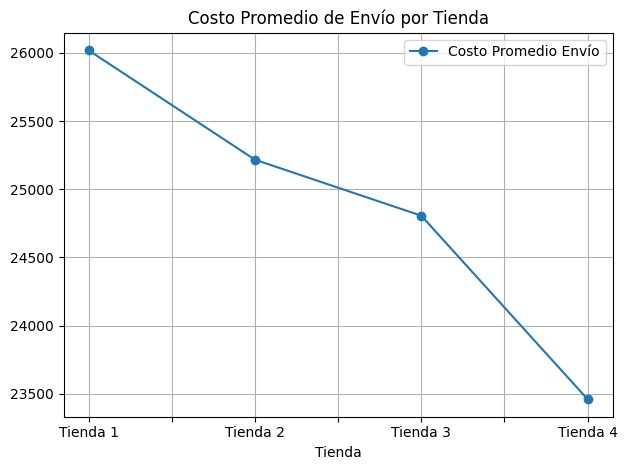

In [20]:
costo_envio_promedio_tiendas.plot(
    title = 'Costo Promedio de Envío por Tienda',
    grid=True,
    marker='o'
)
plt.tight_layout()
plt.show()

# Conclusión del informe

La forma en que se determinará cuál tienda deberá ser vendida será exactamente midiendo:


1.   Ingresos totales
2.   Calificación promedio
3.   Costo Promedio de envíos

A pesar de haberse realizado un análisis de otras 2 secciones (ventas por categoría y productos más y menos vendidos), se decidió que estas 2 últimas categorías no tienen una relevancia alta para determinar qué tan bien está funcionando la tienda. Por ende, se tomarán las secciones consideradas relevantes que miden qué tan felices están los clientes con cada tienda, cuánto generan y cuánto gastan en envío.

Considere que las cateogrías "descartadas" pueden ser de utilidad posteriormente para determinar qué productos o categorías son mejor/peor vendidos dependiendo de la localización de la tienda. Pero actualmente se está midiendo qué tan rentables monetariamente le son a su dueño.

Iniciando por la Calificación Promedio por Cada Tienda, se puede observar qué las tiendas se encuentran bastante balanceadas en términos de calificación, encabezado muy ligeramente por la tienda 3. La diferencia entre la tienda con mayor calificación (3) y la menor (1) es de:

In [21]:
diferencia_calificacion = calificacion_promedio_tiendas.loc["Tienda 3", "Calificación"] - calificacion_promedio_tiendas.loc["Tienda 1", "Calificación"]
float( diferencia_calificacion.round(2) )

0.07

**Nota:** Abajo puede encontrar las calificaciones exactas por cada tienda si desea observalos.

In [22]:
calificacion_promedio_tiendas

,Calificación
Tienda,
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


Como se puede observar, la diferencia de calificación entre la mejor y peor tienda es de 0.07, al ser tan mínima. Se determina entonces que la calificación no afectará la decisión de cuál tienda deberá venderse.

Ahora, analizando los ingresos y el costo de envío se puede observar que la Tienda 2 y 3 están balanceadas, ambas poseen ingresos y costos de envío similares.

Por su parte, a pesar de que la Tienda 1 tiene los ingresos más altos, también posee los costos de envío más caros, A su vez, la Tienda 4 posee los menores ingresos pero sus costos de envío son los menores.

No es explícito cómo están distribuidos los ingresos totales, entonces se hará una suposición de la cuál se determinará cuál tienda debe venderse.

## Primer Escenario

En este escenario, el valor de los ingresos totales por cada tienda ya tienen deducidos los costos de envío. Dicho esto, se puede determinar que la Tienda 1 es la que mejor desempeño tiene, seguido de la 2, 3 y finalmente la 4.

Es decir, en este escenario la Tienda 4 es la que debe ser vendida.

¿Por qué? Tiene calificación similar al resto de tiendas, pero sus ingresos son considerablemente inferiores a pesar de que sus costos de envío son menores.

In [23]:
diferencias = []
mejorar_formato_ingreso = lambda x: f'{x/1e6:.0f}M'
for i in range(1,4):
  diferencia = ingresos_totales.loc[ f'Tienda {i}', 'Ingreso Total'] - ingresos_totales.loc['Tienda 4', 'Ingreso Total']
  diferencia_formateada = mejorar_formato_ingreso(diferencia)
  diferencias.append( diferencia_formateada )


pd.DataFrame({
    'Tienda' : [ 'Tienda 1', 'Tienda 2', 'Tienda 3'],
    'Diferencia de Ingresos Respecto a Tienda 4' : [ diferencias[0], diferencias[1], diferencias[2] ]
}).set_index('Tienda')

,Diferencia de Ingresos Respecto a Tienda 4
Tienda,
Tienda 1,113M
Tienda 2,78M
Tienda 3,60M


Como se puede observar, todas la Tiendas 1, 2 y 3 tienen ingresos considerablemente superiores. Por tanto, **la Tienda 4 es la que debe venderse.**

## Segundo Escenario

En este escenario, la deducción de los costos de envío no se han realizado a los ingresos totales. Aquí se hará este cálculo para determinar qué tanto afecta este detalle a los ingresos totales. Después se compararán las tiendas con los nuevos ingresos totales + la deducción de costos de envío promedio.

In [24]:
def nuevo_ingreso_total_tienda( ingreso_tienda, costo_promedio, tienda ):
  ingreso_total_tienda = ingreso_tienda - (costo_promedio * tienda.shape[0])
  return mejorar_formato_ingreso(ingreso_total_tienda)

In [25]:
nuevo_ingreso_total_tienda1 = nuevo_ingreso_total_tienda(ingreso_total_tienda1, costo_envio_promedio_tienda1, tienda)
nuevo_ingreso_total_tienda2 = nuevo_ingreso_total_tienda(ingreso_total_tienda2, costo_envio_promedio_tienda2, tienda2)
nuevo_ingreso_total_tienda3 = nuevo_ingreso_total_tienda(ingreso_total_tienda3, costo_envio_promedio_tienda3, tienda3)
nuevo_ingreso_total_tienda4 = nuevo_ingreso_total_tienda(ingreso_total_tienda4, costo_envio_promedio_tienda4, tienda4)

Resultado del nuevo cálculo

In [26]:
pd.DataFrame({
    'Tienda': [ 'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total - Costos de Envío Promedio' : [ nuevo_ingreso_total_tienda1,
                                                   nuevo_ingreso_total_tienda2,
                                                   nuevo_ingreso_total_tienda3,
                                                   nuevo_ingreso_total_tienda4]
}).set_index('Tienda')

,Ingreso Total - Costos de Envío Promedio
Tienda,
Tienda 1,1090M
Tienda 2,1057M
Tienda 3,1040M
Tienda 4,983M


Estos datos se obtuvieron mediante la siguiente operación:

$$
\text{Ingreso Total}_{\text{Tienda}}
-
\left(
\text{Costo Envío Promedio}_{\text{Tienda}}
\cdot
\text{Cantidad de Registros}_{\text{Tienda}}
\right)
$$

**Nota:** Para las Tiendas 1, 2 y 3 la cantidad de registros era de 2359, para la Tienda 4 de 2358.

Como se puede observar, incluso bajo este escenario la Tienda 4 posee menor rendimiento monetario aún en el segundo escenario. Por lo tanto, **la tienda que debe de venderse es la Tienda 4.**